In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


In [5]:
path = './../Data/'
usdjpy = './../Data/USDJPY_M15_202010070430_202410140915.csv'
os.listdir(path)

['GBPUSD_M15_202010071130_202410140915.csv',
 'NZDUSD_M15_202010010000_202410140915.csv',
 'USDJPY_M15_202010070430_202410140915.csv',
 'AUDNZD_M15_202010010000_202410140915.csv',
 'NZDJPY_M15_202010010000_202410140915.csv',
 'EURGBP_M15_202010010000_202410140915.csv',
 'AUDUSD_M15_202010010000_202410140915.csv',
 'GBPJPY_M15_202010010000_202410140915.csv',
 'EURUSD_M15_202010070145_202410140915.csv',
 'EURJPY_M15_202010010000_202410140915.csv',
 'CADJPY_M15_202010010000_202410140915.csv',
 'USDSGD_M15_202010010000_202410140915.csv']

In [45]:
def preprocess_data(df: pd.DataFrame, atr_length=14)->pd.DataFrame:
    df['<BODY_LENGTH>'] = abs(df['<CLOSE>'] - df['<OPEN>']) 
    df['<ATR>'] = df['<BODY_LENGTH>'].rolling(atr_length).mean()
    df.dropna(inplace=True)
    return df

def load_data(path: str)->pd.DataFrame:
    df = pd.read_csv(usdjpy, delimiter='\t')
    df = preprocess_data(df)
    return df

df = load_data(usdjpy)
df.head(20)

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>,<BODY_LENGTH>,<ATR>
13,2020.10.07,07:45:00,105.723,105.741,105.710,105.725,425,0,1,0.002,0.010429
14,2020.10.07,08:00:00,105.725,105.733,105.709,105.722,231,0,1,0.003,0.009929
15,2020.10.07,08:15:00,105.722,105.727,105.712,105.727,150,0,1,0.005,0.008500
16,2020.10.07,08:30:00,105.727,105.756,105.724,105.744,465,0,1,0.017,0.009214
17,2020.10.07,08:45:00,105.744,105.771,105.735,105.746,422,0,0,0.002,0.009214
18,2020.10.07,09:00:00,105.746,105.766,105.745,105.753,527,0,0,0.007,0.009500
19,2020.10.07,09:15:00,105.753,105.762,105.740,105.744,421,0,0,0.009,0.009429
20,2020.10.07,09:30:00,105.744,105.750,105.726,105.743,296,0,1,0.001,0.008714
21,2020.10.07,09:45:00,105.743,105.744,105.724,105.730,208,0,2,0.013,0.009143
22,2020.10.07,10:00:00,105.731,105.770,105.716,105.766,667,0,0,0.035,0.011286


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100026 entries, 0 to 100025
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   <DATE>     100026 non-null  object 
 1   <TIME>     100026 non-null  object 
 2   <OPEN>     100026 non-null  float64
 3   <HIGH>     100026 non-null  float64
 4   <LOW>      100026 non-null  float64
 5   <CLOSE>    100026 non-null  float64
 6   <TICKVOL>  100026 non-null  int64  
 7   <VOL>      100026 non-null  int64  
 8   <SPREAD>   100026 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 6.9+ MB


In [58]:
'''
G = Bull Candle = A
R = Bear Candle = B
N = No Color Candle = C

E = Candle == ATR ratio = D
SSS = Candle <<< ATR = E
SS = Candle << ATR = F
S = Candle < ATR = G
BBB = Candle >>> ATR = H
BB = Canadle >> ATR = I
B = Candle > ATR = J

M = Top Wick == Bot Wick = K
LLL = Bot Wick >>> TopWick = L
LL = Bot Wick >> TopWick = M 
L = Bot Wick > TopWick = N

UUU = Top Wick >>> Bot Wick = O
UU = Top Wick >> Bot Wick = P 
U = Top Wick > Bot Wick = Q
'''

def isbull(open: float, close: float)-> bool:
    return close > open

def bear_bull(open: float, close: float) -> str:
    
    if open < close:
        return 'A'  # bull candle
    elif open > close:
        return 'B' # bear candle
    # in rare case open == close
    return 'C' 
    
def candle_to_atr_ratio(open: float, close: float, atr: float, eps: float = 0.05) -> str:
    canlde_height = abs(open - close)
    ratio = canlde_height/(atr + 1e-6)
    
    if ratio < 1 + eps and ratio > 1 - eps:
        return 'D'
    
    if ratio < 0.25:
        return "E"

    if ratio < 0.5:
        return "F"
    
    if ratio < 1 - eps:
        return "G"
    
    if ratio > 1.75:
        return "H"
    
    if ratio > 1.50:
        return "I"
    
    if ratio > 1 + eps:
        return "J"
    
    raise ValueError("Sanity Check")

def top_bot_wick_ratio(high: float, low: float, open: float, close: float, eps: float=0.05)-> str:
    if isbull(open, close):
        top_wick = high - close
        bot_wick = open - low
    else:
        top_wick = high - open
        bot_wick = close - low
    
    ratio = top_wick/(bot_wick + 1e-6)


    if ratio < 1 + eps and ratio > 1 - eps:
        return 'K'
    
    if ratio < 0.25:
        return "L"

    if ratio < 0.5:
        return "M"
    
    if ratio < 1 - eps:
        return "N"
    
    if ratio > 1.75:
        return "O"
    
    if ratio > 1.50:
        return "P"
    
    if ratio > 1 + eps:
        return "Q"
    
    raise ValueError("Sanity Check")

def candle2char(open:float, close: float, low: float,
                 high: float, vol: float, atr: float, eps:float=0.05) -> str:
    candle = ''
    candle += bear_bull(open, close)
    candle += candle_to_atr_ratio(open, close, atr, eps)
    candle += top_bot_wick_ratio(high, low, open, close, eps)
    return candle

def processs_df_row(row, eps=0.05):
    open = row['<OPEN>']
    close = row['<CLOSE>']
    high = row['<HIGH>']
    low = row['<LOW>']
    atr = row['<ATR>']
    vol = row['<VOL>']
    return candle2char(open, close, low, high, vol, atr, eps)

def preprocess_data(df: pd.DataFrame, atr_length=14)->pd.DataFrame:
    df['<BODY_LENGTH>'] = abs(df['<CLOSE>'] - df['<OPEN>']) 
    df['<ATR>'] = df['<BODY_LENGTH>'].rolling(atr_length).mean()
    df.dropna(inplace=True)
    df['word'] = df.apply(lambda row: processs_df_row(row), axis=1)
    return df

def load_data(path: str)->pd.DataFrame:
    df = pd.read_csv(usdjpy, delimiter='\t')
    df = preprocess_data(df)
    return df

df = load_data(usdjpy)
df.head()


,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>,<BODY_LENGTH>,<ATR>,word
13,2020.10.07,07:45:00,105.723,105.741,105.710,105.725,425,0,1,0.002,0.010429,AEQ
14,2020.10.07,08:00:00,105.725,105.733,105.709,105.722,231,0,1,0.003,0.009929,BFN
15,2020.10.07,08:15:00,105.722,105.727,105.712,105.727,150,0,1,0.005,0.008500,AGL
16,2020.10.07,08:30:00,105.727,105.756,105.724,105.744,465,0,1,0.017,0.009214,AHO
17,2020.10.07,08:45:00,105.744,105.771,105.735,105.746,422,0,0,0.002,0.009214,AEO


In [57]:

def get_all_combinations():
    color = list('abc')
    size_ratio = list('defghij')
    wick_ratio = list('klmnopq')


    opts = [color, size_ratio, wick_ratio]
    res = []
    def fill_opts(i, word=[]):
        if i == 3:
            res.append(word[:])
            return
        
        for item in opts[i]:
            word += item
            fill_opts(i+1, word)
            word.pop()



    fill_opts(0)
    return res[:]

def get_itos_dicts():

    combos = get_all_combinations()

    stoi = {}
    itos = {}

    for i, c in enumerate(combos):
        # print(i, ''.join(c))
        w = ''.join(c)
        stoi[w] = i
        itos[i] = w
    return (stoi, itos)

stoi , itos = get_itos_dicts()

In [64]:
from glob import glob

data_path = './../Data/'

files = glob(f'{data_path}/*.csv')

save_path = './../Data/stringified_data/'
for file in tqdm(files):
    df = load_data(file)
    save_file_path = file.replace(data_path, save_path).replace('.csv', '.txt')
    # df['encoded_word'] = df['word'].apply(lambda x: stoi[x.lower()])
    sequence = ' '.join(df['word'].tolist())
    with open(save_file_path, 'w') as f:
        f.writelines(sequence)
    

In [166]:
data_path_pattern = ('./../Data/stringified_data/*.txt')
def split_data(data_path: str, save_path: str=None, tokenizer_split=0.15, train_split=0.65):
    token_dataset = []
    train_dataset = []
    test_dataset  = []
    
    files = glob(data_path)
    for file in tqdm(files):
        with open(file, 'r') as f:
            doc = f.readlines()[0].split()
        n1 = int(len(doc) * tokenizer_split)
        n2 = int(len(doc) * (tokenizer_split+train_split))
        token_dataset.extend(doc[:n1][:])
        train_dataset.extend(doc[n1:n2][:])
        test_dataset.extend(doc[n2:][:])
        token_dataset.append('\n')
        train_dataset.append('\n')
        test_dataset.append('\n')
        
    token_dataset = ' '.join(token_dataset)
    train_dataset = ' '.join(train_dataset)
    test_dataset = ' '.join(test_dataset)

    if save_path:
        for ds, name in zip(
            [token_dataset, train_dataset, test_dataset], ['token', 'train', 'test']):
            save_file_path = os.path.join(save_path, f'{name}.txt')
            with open(save_file_path, 'w') as f:
                f.writelines(ds)
    
    return (token_dataset, train_dataset, test_dataset)

save_path = './../Data/preprocessed_data/'
token_data, train_data, test_data = split_data(data_path_pattern, save_path)

100%|██████████| 12/12 [00:00<00:00, 220.76it/s]


In [5]:
with open("/home/ird/workspace/tradeformer/Data/preprocessed_data/test.txt", 'r') as f:
    doc = f.readlines()

len(' '.join(doc))

960178

In [105]:
doc_path = './../Data/stringified_data/AUDNZD_M15_202010010000_202410140915.txt'
with open(doc_path, 'r') as f:
    doc = f.readlines()[0].split()

tokens = [stoi[w.lower()] for w in doc]
len(tokens)

100013

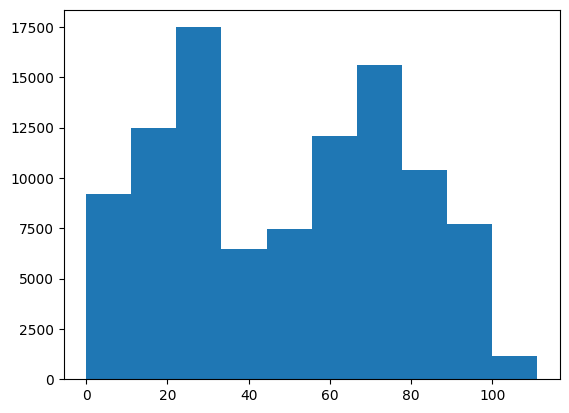

In [106]:
import matplotlib.pyplot as plt

plt.hist(tokens)
plt.show()

In [91]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]):
        counts[pair] = counts.get(pair, 0) + 1
    return counts

def merge(ids, pair, idx):
    newids = []
    i = 0
    while i < len(ids):
        if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
            newids.append(idx)
            i+=2
        else:
            newids.append(ids[i])
            i += 1
    return newids


unique_tokens = max(itos)
vocab_size = 1000
num_merges = 1000 - unique_tokens
num_merges

854

In [107]:
merges = {}
ids = list(tokens)

for i in tqdm(range(num_merges)):
    stats = get_stats(ids)
    pair = max(stats, key=stats.get)
    idx = unique_tokens + i
    ids = merge(ids, pair, idx)
    merges[pair] = idx

100%|██████████| 854/854 [00:23<00:00, 36.50it/s]


In [113]:
print("token Length: ", len(tokens))
print("ids lenght: ", len(ids))
print(f"compression ratio: {len(tokens)/len(ids): .2f}X")

token Length:  100013
ids lenght:  73653
compression ratio:  1.36X


In [112]:
len(tokens)/len(ids)

1.3578944510067479

In [114]:
merges

{(25, 25): 146,
 (32, 32): 147,
 (74, 25): 148,
 (25, 74): 149,
 (25, 46): 150,
 (78, 32): 151,
 (71, 25): 152,
 (74, 46): 153,
 (25, 32): 154,
 (25, 11): 155,
 (78, 78): 156,
 (74, 32): 157,
 (67, 25): 158,
 (25, 18): 159,
 (32, 95): 160,
 (18, 25): 161,
 (25, 67): 162,
 (74, 78): 163,
 (74, 22): 164,
 (46, 74): 165,
 (25, 60): 166,
 (81, 32): 167,
 (46, 32): 168,
 (25, 22): 169,
 (11, 74): 170,
 (71, 18): 171,
 (74, 18): 172,
 (95, 25): 173,
 (46, 46): 174,
 (46, 18): 175,
 (71, 71): 176,
 (78, 25): 177,
 (60, 32): 178,
 (74, 67): 179,
 (11, 32): 180,
 (46, 25): 181,
 (18, 67): 182,
 (11, 25): 183,
 (74, 74): 184,
 (60, 25): 185,
 (32, 25): 186,
 (18, 18): 187,
 (74, 71): 188,
 (46, 71): 189,
 (46, 95): 190,
 (32, 74): 191,
 (18, 46): 192,
 (78, 81): 193,
 (22, 25): 194,
 (18, 71): 195,
 (25, 71): 196,
 (74, 60): 197,
 (78, 29): 198,
 (46, 11): 199,
 (18, 22): 200,
 (92, 32): 201,
 (32, 81): 202,
 (74, 95): 203,
 (78, 46): 204,
 (22, 71): 205,
 (60, 46): 206,
 (22, 67): 207,
 (18, 32

In [140]:
vocab = dict(itos)
for (p0, p1), idx in merges.items():
    vocab[idx] = vocab[p0] + " " + vocab[p1]

def decode(ids):
    # given ids (list of integers), return candle words
    text = " ".join(vocab[idx] for idx in ids)
    return text.upper()

def encode(text: str):
    tokens = [stoi[w.lower()] for w in text.split()]
    while len(tokens) >= 2:
        stats = get_stats(tokens)
        pair = min(stats, key=lambda p: merges.get(p, float("inf")))
        if pair not in merges:
            break # nothing can be merged
        idx = merges[pair]
        tokens = merge(tokens, pair, idx)
    return tokens


In [141]:
test_inp = ' '.join(doc[0:10]) 
test_inp

'AEQ BFN AGL AHO AEO AGO BDO BEM BJL AHM'

In [142]:
decode(encode(test_inp))

'AEQ BFN AGL AHO AEO AGO BDO BEM BJL AHM'

In [1]:
from tokenizer import MarketTokenizer

In [2]:
t = MarketTokenizer()

In [4]:
import os

vocab_size = 1000
token_data_path = './../Data/preprocessed_data/token.txt'
save_path = './saved_weights'

os.makedirs(save_path, exist_ok=True)

t.train(vocab_size=vocab_size, token_data_path=token_data_path, save_path=save_path)

100%|██████████| 854/854 [00:32<00:00, 26.68it/s]


AttributeError: 'str' object has no attribute 'write'